# Data cleanining
## Imports

In [1]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data in DataFrame

In [2]:
# Read data
data = pd.read_csv("/Users/fatemehsoltanzade/Becode/ImmoData-EDA/Data/Immoweb_scraping_result.csv")

## Look at data

In [3]:
# First look
data.head()

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
0,20320744,1150,APARTMENT,APARTMENT,575000,residential_sale,3,160.0,1.0,0.0,...,1.0,40.0,1.0,290.0,290.0,NaN,NaN,0.0,GOOD,single
1,20317718,9000,APARTMENT,APARTMENT,390000,residential_sale,3,96.0,1.0,0.0,...,1.0,29.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
2,20315842,9051,APARTMENT,APARTMENT,260000,residential_sale,1,76.0,1.0,0.0,...,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
3,20315799,9051,APARTMENT,APARTMENT,325000,residential_sale,1,81.0,1.0,0.0,...,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
4,20315776,9051,APARTMENT,APARTMENT,365000,residential_sale,3,101.0,1.0,0.0,...,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound


In [4]:
# Number rows and columns
data.shape

(15516, 21)

## Find and handle duplicates

In [5]:
# Complete duplicates

duplicates_complete = data.duplicated(keep= False) # On all columns, show all the duplicates (keep none, first or last)
data[duplicates_complete].sort_values(by= 'id') # Complete duplicates


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
499,9380777,8430,APARTMENT,APARTMENT,311500,residential_sale,2,79.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
1402,9380777,8430,APARTMENT,APARTMENT,311500,residential_sale,2,79.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
13036,9380780,8430,APARTMENT,APARTMENT,297000,residential_sale,2,82.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
12133,9380780,8430,APARTMENT,APARTMENT,297000,residential_sale,2,82.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
5282,9380781,8430,APARTMENT,APARTMENT,321500,residential_sale,2,79.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,20319797,9100,HOUSE,HOUSE,430000,residential_sale,5,188.0,1.0,NaN,...,1.0,NaN,1.0,120.0,120.0,375.0,NaN,NaN,NaN,single
6083,20320128,8310,HOUSE,VILLA,245000,residential_sale,3,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,301.0,NaN,NaN,TO_RENOVATE,single
13840,20320128,8310,HOUSE,VILLA,245000,residential_sale,3,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,301.0,NaN,NaN,TO_RENOVATE,single
9962,20320926,8200,HOUSE,EXCEPTIONAL_PROPERTY,1935000,residential_sale,6,718.0,1.0,0.0,...,1.0,NaN,NaN,NaN,NaN,5085.0,4.0,1.0,AS_NEW,single


In [6]:
# 3096 rows.... drop complete duplicates
# 1551 rows / 15516 = 10% données
data.drop_duplicates(inplace= True)
data.shape

(13965, 21)

In [8]:
# Based on ImmoWeb code - 0 rows, good!
duplicates_code = data.duplicated(['id'], keep= False) # On id, show all the duplicates (keep none, first or last)
data[duplicates_code].sort_values(by= 'id') # Duplicated immoweb id

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing


In [7]:
# Check for duplicates on everything except code - 1402 rows.... 
# some clearly duplicates, others are just multiple similar apartments in new project

duplicates_other = data.duplicated(subset= list(data.columns)[1:], keep= False)
data[duplicates_other].sort_values(by= ['Locality', 'Price'])


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
427,9887765,1000,APARTMENT,APARTMENT,216500,residential_sale,1,24.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,compound
3284,20027573,1000,APARTMENT,KOT,216500,residential_sale,0,24.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
4306,9887769,1000,APARTMENT,APARTMENT,216500,residential_sale,1,24.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,compound
11041,20027550,1000,APARTMENT,KOT,216500,residential_sale,0,24.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
12063,9887764,1000,APARTMENT,APARTMENT,216500,residential_sale,1,24.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,20317621,9940,APARTMENT,GROUND_FLOOR,410000,residential_sale,3,146.0,1.0,0.0,...,1.0,29.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,single
9,20317589,9940,APARTMENT,PENTHOUSE,445000,residential_sale,2,122.0,1.0,0.0,...,1.0,48.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
5951,20317623,9940,APARTMENT,PENTHOUSE,445000,residential_sale,2,122.0,1.0,0.0,...,1.0,48.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,single
6753,20317652,9940,APARTMENT,PENTHOUSE,445000,residential_sale,2,122.0,1.0,0.0,...,1.0,48.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound


In [8]:
# Since are duplicated in ALL values, except for ID - assume are duplicated listings
# To check, this loses 843 rows - representing 6.04% of data

column_names = list(data.columns)[1:]
data.drop_duplicates(subset = column_names, inplace= True)
data.shape

(13122, 21)

In [9]:
# Check for duplicates on postal code, price etc
# Based on compound properties with multiple similar listings, multiple listings for different agenciies...
# Check how much data lose if just completely remove all these duplicates, keeping, in theory, only one property per compound property
# And per multiple listing for same property
# Data cleaner, no influence on means, medians etc.... better for analysis
# Does not represent huge amount of data to lose
# Go through case by case too labour-intensive for practical purposes

duplicates_postpricearea = data.duplicated(['Locality', 'Price', 'Living Area', 'Number of rooms'], keep= False)
data[duplicates_postpricearea].sort_values(by= ['Locality', 'Price'])


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
3284,20027573,1000,APARTMENT,KOT,216500,residential_sale,0,24.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
4859,20135500,1000,APARTMENT,KOT,216500,residential_sale,0,24.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,single
1036,20320688,1000,APARTMENT,FLAT_STUDIO,260000,residential_sale,0,40.0,NaN,NaN,...,1.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,compound
3999,20296287,1000,APARTMENT,FLAT_STUDIO,260000,residential_sale,0,40.0,NaN,0.0,...,1.0,3.0,NaN,NaN,NaN,NaN,2.0,0.0,GOOD,compound
1439,10455138,1000,APARTMENT,FLAT_STUDIO,265000,residential_sale,0,54.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11151,10132129,9940,APARTMENT,APARTMENT,445000,residential_sale,2,122.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS_NEW,compound
968,10588070,9961,APARTMENT,APARTMENT,339750,residential_sale,3,127.0,1.0,0.0,...,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,single
1370,10588074,9961,APARTMENT,APARTMENT,339750,residential_sale,3,130.0,1.0,0.0,...,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
5249,10588073,9961,APARTMENT,APARTMENT,339750,residential_sale,3,127.0,1.0,0.0,...,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound


In [10]:
# dropped 1197 / 13122 lines = 9.12% data loss
# Large amount of observations - but final dataset still above 10.000 observations AND cleaner than if left duplicates
# Value clean data, and remove influence of duplication on analysis rather than amount of data
# Pretty sure now that all rows in dataset are individual properties - even if lost properties very similar in new projects

column_names = ['Locality', 'Price', 'Living Area', 'Number of rooms']
data.drop_duplicates(subset = column_names, inplace= True)
data.to_csv('clean_data.csv')

## Missing data

In [11]:
# Finding rows with number of NaN
data[data.isna().sum(axis=1) == 9]

# 16 rows 12 NaN
# 246 rows 11
# 345 10
# 1152 9


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
17,20313211,1070,APARTMENT,KOT,132350,residential_sale,0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,AS_NEW,compound
53,20313188,1070,APARTMENT,KOT,213600,residential_sale,0,34.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,AS_NEW,compound
134,20299080,2018,APARTMENT,PENTHOUSE,685000,residential_sale,3,205.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JUST_RENOVATED,single
140,20320982,3051,HOUSE,VILLA,398000,residential_sale,0,335.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,510.0,NaN,NaN,TO_RENOVATE,single
149,20302664,9620,APARTMENT,APARTMENT,169000,residential_sale,2,111.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15392,20286415,3020,HOUSE,HOUSE,650000,residential_sale,4,295.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1560.0,2.0,NaN,NaN,single
15415,20308471,8800,HOUSE,HOUSE,639000,residential_sale,3,224.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,420.0,3.0,NaN,NaN,single
15470,20270287,3000,APARTMENT,APARTMENT,215000,residential_sale,1,22.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,single
15488,20162961,3530,HOUSE,HOUSE,299000,residential_sale,3,190.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2108.0,NaN,NaN,TO_RENOVATE,single


## Data type constraints

In [116]:
# Check data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11925 entries, 0 to 15515
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                11925 non-null  int64  
 1   Locality                          11925 non-null  object 
 2   Type of property                  11925 non-null  object 
 3   Subtype of property               11925 non-null  object 
 4   Price                             11925 non-null  float64
 5   Type of sale                      11925 non-null  object 
 6   Number of rooms                   11925 non-null  int64  
 7   Living Area                       11736 non-null  float64
 8   Fully equipped kitchen            8292 non-null   float64
 9   Furnished                         5540 non-null   float64
 10  Fireplace                         11925 non-null  int64  
 11  Terrace                           9202 non-null   float64
 12  Terrace a

In [12]:
# Fix data types
# Boolean 0/1 values pres-abs can be left in float to preserve NaN ; int doesn't take NaN and not necessary to convert to string
# OPM : for EDA, but in modelling, does leaving float assume continuous variable and error, instead of one-hot encoding
# Fireplace int (because no missing data)

data['Locality'] = data['Locality'].astype('str')
data['Price'] = data['Price'].astype('float')
#data['Fully equipped kitchen'] = data['Fully equipped kitchen'].fillna(-1).astype('int64')
#data['Fully equipped kitchen'] = data['Fully equipped kitchen'].replace(-1, np.nan)
#data['Furnished'] = data['Furnished'].fillna(-1).astype('str')
#data['Furnished'] = data['Furnished'].replace(-1, np.nan)
#data['Terrace'] = data['Terrace'].fillna(-1).astype('int64')
#data['Terrace'] = data['Terrace'].replace(-1, np.nan)
#data['Garden'] = data['Garden'].fillna(-1).astype('int64')
#data['Garden'] = data['Garden'].replace(-1, np.nan)
#data['Number of facades'] = data['Number of facades'].fillna(-1).astype('int64')
#data['Number of facades'] = data['Number of facades'].replace(-1, np.nan)
#data['Swimming pool'] = data['Swimming pool'].fillna(-1).astype('int64')
#data['Swimming pool'] = data['Swimming pool'].replace(-1, np.nan)



## Verifying categorical values - value consistency
### Postal code

In [13]:


data[data['Locality'].apply(lambda x: len(x) != 4)] # All postalcodes are 4 digits long


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing


### Type of property
All properties either APARTMENT or HOUSE


In [14]:
data['Type of property'].value_counts()


Type of property
APARTMENT    7718
HOUSE        4207
Name: count, dtype: int64

### Subtype of property
Many different categories and strong group imbalance
BUT subtype - so exclude from analysis
- reassign those can reassign
- drop really low categories

In [15]:
data['Subtype of property'].value_counts()

Subtype of property
APARTMENT               6355
HOUSE                   3154
VILLA                    397
GROUND_FLOOR             381
PENTHOUSE                330
FLAT_STUDIO              270
DUPLEX                   235
MIXED_USE_BUILDING       168
APARTMENT_BLOCK          152
EXCEPTIONAL_PROPERTY      76
MANSION                   76
TOWN_HOUSE                53
COUNTRY_COTTAGE           53
BUNGALOW                  47
KOT                       45
SERVICE_FLAT              44
LOFT                      40
FARMHOUSE                 18
TRIPLEX                   18
CHALET                     5
MANOR_HOUSE                4
CASTLE                     3
OTHER_PROPERTY             1
Name: count, dtype: int64

### Type of sale
All are of same type - residential_sale
-> Drop column

In [77]:
data['Type of sale'].value_counts()

Type of sale
residential_sale    11925
Name: count, dtype: int64

### Fully equipped kitchen
Two values, ok

In [16]:
data['Fully equipped kitchen'].value_counts()

Fully equipped kitchen
1.0    8292
Name: count, dtype: int64

### Compound listing
All of correct values, single or compound

In [79]:
data['Compound Listing'].value_counts()

Compound Listing
single      7388
compound    4537
Name: count, dtype: int64

### State of the building

Strong group imbalance
- GOOD/AS_NEW
- TO_RENOVATE/TO_BE_DONE_UP/JUST_RENOVATED/TO_RESTORE

Reassign NaN?
Reassign values? TO_RENOVATE/TO_BE_DONE_UP/TO_RESTORE and AS_NEW/JUST_RENOVATED

In [80]:
data['State of the building'].value_counts()

State of the building
GOOD              4123
AS_NEW            2887
TO_RENOVATE        844
TO_BE_DONE_UP      721
JUST_RENOVATED     576
TO_RESTORE          28
Name: count, dtype: int64

### Furnished
2 values or Nan - ok

In [81]:
data['Furnished'].value_counts()

Furnished
0.0    5165
1.0     375
Name: count, dtype: int64

### Fireplace
Two values - ok

In [82]:
data['Fireplace'].value_counts()

Fireplace
0    11545
1      380
Name: count, dtype: int64

### Terrace
All 1 or NaN - ok

In [83]:
data['Terrace'].value_counts()

Terrace
1.0    9202
Name: count, dtype: int64

### Garden
all 1 or NaN - ok

In [84]:
data['Garden'].value_counts()

Garden
1.0    2545
Name: count, dtype: int64

### Swimming pool
Two values or NaN - ok

In [17]:
data['Swimming pool'].value_counts()

Swimming pool
0.0    4037
1.0     233
Name: count, dtype: int64

## Verifying numerical data

In [18]:
data[['Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Garden area', 'Surface of the land', 'Surface area of the plot of land', 'Number of facades']].describe()

,Price,Number of rooms,Living Area,Terrace area,Garden area,Surface of the land,Surface area of the plot of land,Number of facades
count,1.192500e+04,11925.000000,11736.000000,6857.000000,2545.000000,2545.000000,4207.000000,7615.000000
mean,4.430277e+05,2.560252,142.647580,22.340090,525.212967,525.212967,1088.504873,2.732108
std,3.858024e+05,1.358437,120.841899,53.861694,1312.464646,1312.464646,3199.257047,0.855881
min,2.750000e+04,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2.600000e+05,2.000000,87.000000,9.000000,56.000000,56.000000,180.000000,2.000000
50%,3.480000e+05,2.000000,110.000000,14.000000,150.000000,150.000000,400.000000,2.000000
75%,4.850000e+05,3.000000,164.000000,25.000000,477.000000,477.000000,893.500000,4.000000
max,6.495000e+06,25.000000,4829.000000,3749.000000,18131.000000,18131.000000,64300.000000,6.000000


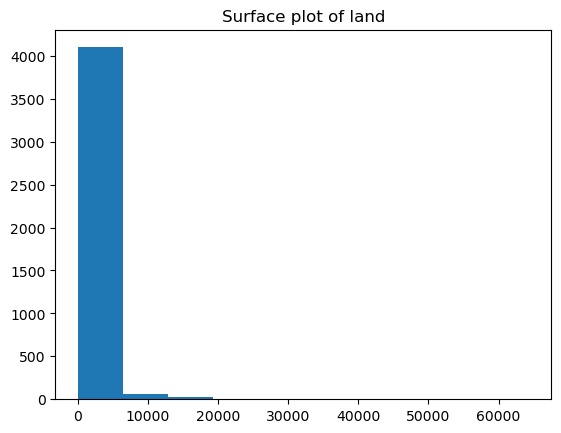

In [87]:
plt.hist(data['Surface area of the plot of land'])
plt.title('Surface plot of land')
plt.show()
# Severely skewed distribution ; remove > 10000 (68 rows)?

In [88]:
data[data['Surface area of the plot of land'] >= 10000]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
329,20287191,9700,HOUSE,COUNTRY_COTTAGE,345000.0,residential_sale,3,302.0,1.0,0.0,...,1.0,NaN,NaN,NaN,NaN,34690.0,4.0,0.0,TO_RENOVATE,single
706,20290335,3450,HOUSE,HOUSE,553000.0,residential_sale,4,209.0,1.0,0.0,...,1.0,NaN,NaN,NaN,NaN,23503.0,3.0,0.0,GOOD,single
720,20285258,8610,HOUSE,FARMHOUSE,649000.0,residential_sale,5,314.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,23912.0,NaN,NaN,TO_RENOVATE,single
831,20286621,8740,HOUSE,VILLA,1895000.0,residential_sale,8,334.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,18262.0,4.0,NaN,GOOD,single
973,20262952,8750,HOUSE,COUNTRY_COTTAGE,1775000.0,residential_sale,7,696.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,19664.0,4.0,NaN,AS_NEW,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14500,20320348,5590,HOUSE,MIXED_USE_BUILDING,1200000.0,residential_sale,9,556.0,1.0,NaN,...,1.0,NaN,1.0,13406.0,13406.0,13406.0,4.0,NaN,NaN,single
14612,20311372,8520,HOUSE,COUNTRY_COTTAGE,735000.0,residential_sale,4,250.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,12518.0,4.0,NaN,TO_RENOVATE,single
15285,20274134,3800,HOUSE,COUNTRY_COTTAGE,1298000.0,residential_sale,5,453.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19223.0,3.0,1.0,AS_NEW,single
15297,20304356,1473,HOUSE,EXCEPTIONAL_PROPERTY,950000.0,residential_sale,7,382.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15400.0,4.0,1.0,TO_BE_DONE_UP,single


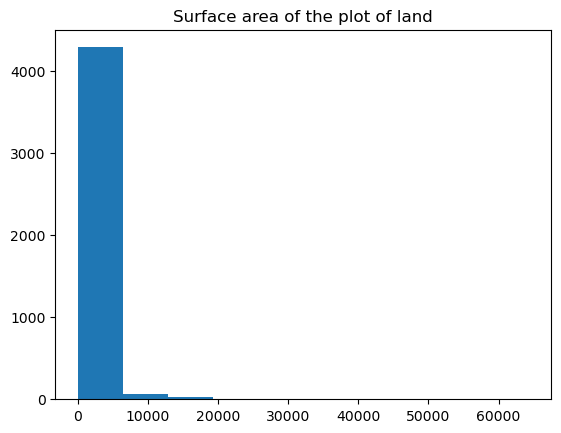

In [ ]:
plt.hist(data['Surface area of the plot of land'])
plt.title('Surface area of the plot of land')
plt.show()

# Drop >= 10_000 (68 rows)

In [160]:
data[data['Surface area of the plot of land'] >= 10_000]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
329,20287191,9700,HOUSE,COUNTRY_COTTAGE,345000.0,residential_sale,3,302.0,1,0.0,...,1,NaN,-1,NaN,NaN,34690.0,4,0,TO_RENOVATE,single
706,20290335,3450,HOUSE,HOUSE,553000.0,residential_sale,4,209.0,1,0.0,...,1,NaN,-1,NaN,NaN,23503.0,3,0,GOOD,single
720,20285258,8610,HOUSE,FARMHOUSE,649000.0,residential_sale,5,314.0,1,0.0,...,-1,NaN,-1,NaN,NaN,23912.0,-1,-1,TO_RENOVATE,single
831,20286621,8740,HOUSE,VILLA,1895000.0,residential_sale,8,334.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,18262.0,4,-1,GOOD,single
973,20262952,8750,HOUSE,COUNTRY_COTTAGE,1775000.0,residential_sale,7,696.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,19664.0,4,-1,AS_NEW,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,20311372,8520,HOUSE,COUNTRY_COTTAGE,735000.0,residential_sale,4,250.0,1,-1.0,...,1,NaN,-1,NaN,NaN,12518.0,4,-1,TO_RENOVATE,single
15285,20274134,3800,HOUSE,COUNTRY_COTTAGE,1298000.0,residential_sale,5,453.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,19223.0,3,1,AS_NEW,single
15297,20304356,1473,HOUSE,EXCEPTIONAL_PROPERTY,950000.0,residential_sale,7,382.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,15400.0,4,1,TO_BE_DONE_UP,single
15432,20303201,4870,HOUSE,APARTMENT_BLOCK,1245000.0,residential_sale,12,814.0,1,0.0,...,1,NaN,-1,NaN,NaN,28600.0,4,0,GOOD,single


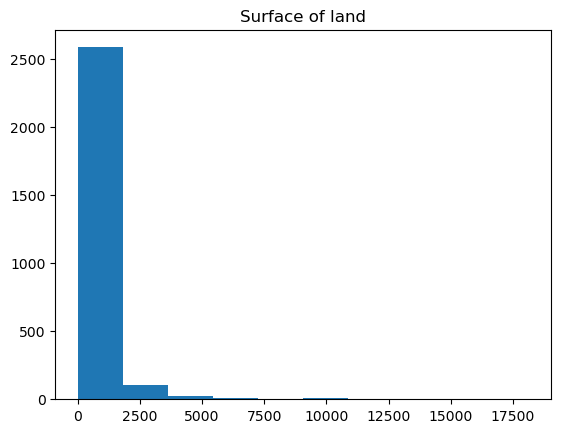

In [ ]:
plt.hist(data['Surface of the land'])
plt.title('Surface of land')
plt.show()

# Severely skewed dist - remove >= 2500 (93 rows)?

In [141]:
data[data['Surface of the land'] >= 2500] # outlier but sound

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
93,20318858,1350,HOUSE,HOUSE,769000.0,residential_sale,5,222.0,1,0.0,...,1,20.0,1,9310.0,9310.0,9592.0,4,0,AS_NEW,single
728,10938778,1180,HOUSE,VILLA,1800000.0,residential_sale,4,219.0,1,0.0,...,1,150.0,1,5000.0,5000.0,5500.0,4,0,TO_RENOVATE,single
766,20148041,4000,HOUSE,VILLA,595000.0,residential_sale,7,455.0,1,-1.0,...,1,28.0,1,3100.0,3100.0,3333.0,4,-1,TO_RENOVATE,single
811,20237920,4900,HOUSE,HOUSE,595000.0,residential_sale,4,214.0,1,0.0,...,1,18.0,1,2908.0,2908.0,3094.0,4,1,GOOD,single
882,20210234,2930,HOUSE,HOUSE,1980000.0,residential_sale,5,689.0,1,-1.0,...,-1,NaN,1,3149.0,3149.0,3149.0,-1,1,GOOD,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14720,20253603,3220,HOUSE,HOUSE,370000.0,residential_sale,5,195.0,1,-1.0,...,1,20.0,1,2500.0,2500.0,3133.0,4,-1,TO_RENOVATE,single
14986,20063113,5380,APARTMENT,APARTMENT,399000.0,residential_sale,3,115.0,-1,-1.0,...,1,55.0,1,6803.0,6803.0,NaN,-1,-1,GOOD,compound
15138,20311635,1400,APARTMENT,APARTMENT,159000.0,residential_sale,2,75.0,1,0.0,...,1,13.0,1,10000.0,10000.0,NaN,4,0,GOOD,single
15335,11211770,3090,HOUSE,VILLA,1195000.0,residential_sale,5,349.0,1,0.0,...,1,130.0,1,5000.0,5000.0,6162.0,4,0,GOOD,single


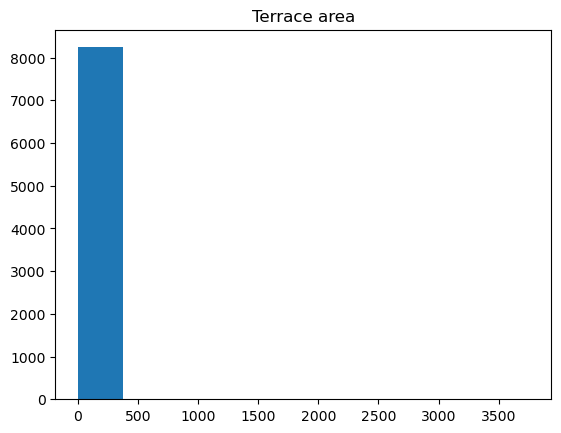

In [ ]:
plt.hist(data['Terrace area'])
plt.title('Terrace area')
plt.show()

# Drop >= 250 ? (19 rows)

In [167]:
data[data['Terrace area'] >= 250]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
2090,20301177,4140,HOUSE,HOUSE,899000.0,residential_sale,13,778.0,1,0.0,...,1,443.0,-1,NaN,NaN,1135.0,4,0,GOOD,single
3349,20063106,5380,APARTMENT,APARTMENT,384000.0,residential_sale,3,119.0,-1,-1.0,...,1,255.0,-1,NaN,NaN,NaN,-1,-1,GOOD,compound
4103,20151817,1050,APARTMENT,PENTHOUSE,4000000.0,residential_sale,4,444.0,1,0.0,...,1,253.0,-1,NaN,NaN,NaN,2,-1,AS_NEW,compound
4180,20142914,8300,HOUSE,VILLA,1395000.0,residential_sale,4,276.0,1,0.0,...,1,323.0,1,323.0,323.0,606.0,4,-1,GOOD,single
5095,20301183,4140,HOUSE,APARTMENT_BLOCK,899000.0,residential_sale,13,778.0,1,0.0,...,1,443.0,-1,NaN,NaN,1135.0,4,0,GOOD,single
5904,20312136,4340,HOUSE,MIXED_USE_BUILDING,950000.0,residential_sale,2,375.0,1,0.0,...,1,540.0,-1,NaN,NaN,2345.0,4,0,AS_NEW,single
6870,20308014,4350,HOUSE,EXCEPTIONAL_PROPERTY,850000.0,residential_sale,5,365.0,1,0.0,...,1,250.0,1,3000.0,3000.0,4788.0,4,1,GOOD,single
7228,20063116,5380,APARTMENT,APARTMENT,389000.0,residential_sale,3,122.0,-1,-1.0,...,1,408.0,-1,NaN,NaN,NaN,-1,-1,GOOD,compound
7991,20302351,4960,APARTMENT,GROUND_FLOOR,280000.0,residential_sale,3,129.0,1,0.0,...,1,3749.0,1,60.0,60.0,NaN,3,0,AS_NEW,single
8594,20057079,4820,HOUSE,HOUSE,350000.0,residential_sale,3,180.0,1,0.0,...,1,835.0,1,700.0,700.0,802.0,4,0,GOOD,single


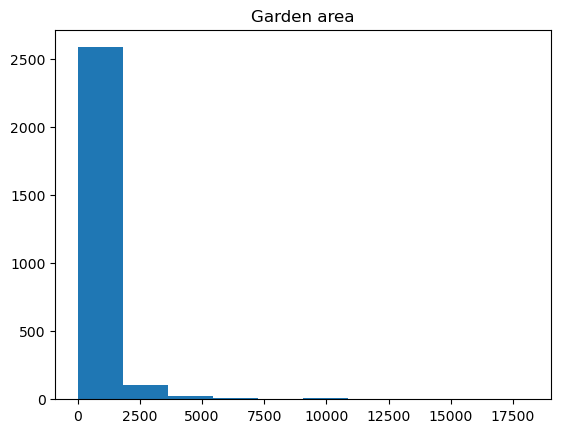

In [ ]:
plt.hist(data['Garden area'])
plt.title('Garden area')
plt.show()

# Drop >= 2500 (93 rows)

In [170]:
data[data['Garden area'] >= 2500]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
93,20318858,1350,HOUSE,HOUSE,769000.0,residential_sale,5,222.0,1,0.0,...,1,20.0,1,9310.0,9310.0,9592.0,4,0,AS_NEW,single
728,10938778,1180,HOUSE,VILLA,1800000.0,residential_sale,4,219.0,1,0.0,...,1,150.0,1,5000.0,5000.0,5500.0,4,0,TO_RENOVATE,single
766,20148041,4000,HOUSE,VILLA,595000.0,residential_sale,7,455.0,1,-1.0,...,1,28.0,1,3100.0,3100.0,3333.0,4,-1,TO_RENOVATE,single
811,20237920,4900,HOUSE,HOUSE,595000.0,residential_sale,4,214.0,1,0.0,...,1,18.0,1,2908.0,2908.0,3094.0,4,1,GOOD,single
882,20210234,2930,HOUSE,HOUSE,1980000.0,residential_sale,5,689.0,1,-1.0,...,-1,NaN,1,3149.0,3149.0,3149.0,-1,1,GOOD,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14720,20253603,3220,HOUSE,HOUSE,370000.0,residential_sale,5,195.0,1,-1.0,...,1,20.0,1,2500.0,2500.0,3133.0,4,-1,TO_RENOVATE,single
14986,20063113,5380,APARTMENT,APARTMENT,399000.0,residential_sale,3,115.0,-1,-1.0,...,1,55.0,1,6803.0,6803.0,NaN,-1,-1,GOOD,compound
15138,20311635,1400,APARTMENT,APARTMENT,159000.0,residential_sale,2,75.0,1,0.0,...,1,13.0,1,10000.0,10000.0,NaN,4,0,GOOD,single
15335,11211770,3090,HOUSE,VILLA,1195000.0,residential_sale,5,349.0,1,0.0,...,1,130.0,1,5000.0,5000.0,6162.0,4,0,GOOD,single


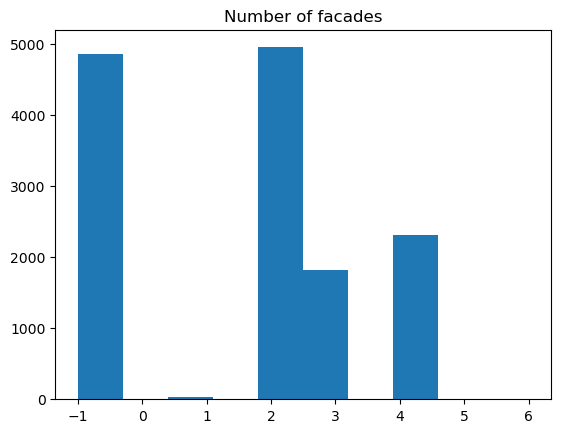

In [ ]:
plt.hist(data['Number of facades'])
plt.title('Number of facades')
plt.show()

# Remove only one (29 rows), and >4 (2 rows) ?

In [145]:
data[data['Number of facades'] > 4] # error? code to 4

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
1655,20157198,1640,HOUSE,VILLA,1250000.0,residential_sale,6,500.0,1,-1.0,...,1,70.0,1,570.0,570.0,1768.0,6,0,AS_NEW,single
11517,20147859,1800,APARTMENT,APARTMENT,397296.0,residential_sale,2,119.0,1,-1.0,...,1,12.0,-1,NaN,NaN,NaN,5,0,AS_NEW,single


In [146]:
data[data['Number of facades'] == 1]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
647,20312956,4031,APARTMENT,APARTMENT,259000.0,residential_sale,2,99.0,1,-1.0,...,-1,NaN,-1,NaN,NaN,NaN,1,0,AS_NEW,single
776,20319782,2000,HOUSE,APARTMENT_BLOCK,419000.0,residential_sale,3,250.0,1,-1.0,...,-1,NaN,-1,NaN,NaN,59.0,1,0,TO_RESTORE,single
1180,20240468,1180,APARTMENT,APARTMENT,419000.0,residential_sale,1,NaN,-1,-1.0,...,1,1.0,1,1.0,1.0,NaN,1,0,AS_NEW,compound
1665,20180576,1000,APARTMENT,FLAT_STUDIO,240000.0,residential_sale,0,41.0,-1,1.0,...,1,2.0,-1,NaN,NaN,NaN,1,0,AS_NEW,single
2163,20308132,8820,HOUSE,BUNGALOW,239000.0,residential_sale,3,170.0,-1,-1.0,...,-1,NaN,1,630.0,630.0,800.0,1,-1,TO_RENOVATE,single
2530,20215667,1000,APARTMENT,APARTMENT,285000.0,residential_sale,2,80.0,1,-1.0,...,1,NaN,-1,NaN,NaN,NaN,1,0,GOOD,single
2615,20292204,8420,APARTMENT,APARTMENT,380000.0,residential_sale,2,108.0,-1,-1.0,...,1,10.0,-1,NaN,NaN,NaN,1,-1,AS_NEW,single
2627,11273032,8300,APARTMENT,APARTMENT,329900.0,residential_sale,1,38.0,1,1.0,...,1,NaN,-1,NaN,NaN,NaN,1,-1,JUST_RENOVATED,single
2708,20244147,2000,APARTMENT,APARTMENT,419000.0,residential_sale,1,95.0,1,-1.0,...,1,30.0,-1,NaN,NaN,NaN,1,0,GOOD,single
5041,20293509,8380,APARTMENT,APARTMENT,240000.0,residential_sale,1,51.0,1,1.0,...,1,2.0,-1,NaN,NaN,NaN,1,-1,GOOD,single


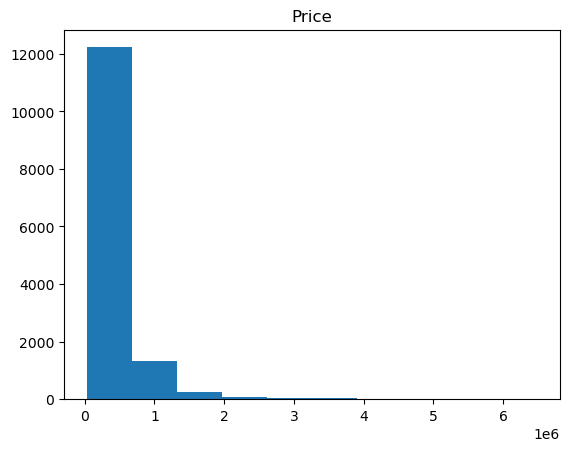

In [ ]:
plt.hist(data['Price'])
plt.title('Price')
plt.show()

# Remove >= 1_000_000 (676 rows)

In [148]:
data[data['Price'] >= 1_000_000] #Duplicate listings, drop one ; and almost all NaN, drop both

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
12,20318961,1310,APARTMENT,APARTMENT,1875000.0,residential_sale,3,260.0,1,0.0,...,1,34.0,-1,NaN,NaN,NaN,3,0,AS_NEW,compound
13,20318942,1310,APARTMENT,APARTMENT,2035000.0,residential_sale,3,293.0,1,0.0,...,1,41.0,-1,NaN,NaN,NaN,-1,0,AS_NEW,compound
142,20316318,8540,HOUSE,VILLA,1195000.0,residential_sale,5,500.0,1,-1.0,...,1,NaN,-1,NaN,NaN,1560.0,4,1,GOOD,single
164,20316000,1040,APARTMENT,PENTHOUSE,1150000.0,residential_sale,3,198.0,-1,-1.0,...,1,42.0,-1,NaN,NaN,NaN,-1,-1,JUST_RENOVATED,single
166,20307949,1150,HOUSE,HOUSE,1195000.0,residential_sale,4,303.0,1,-1.0,...,-1,NaN,1,250.0,250.0,428.0,3,-1,JUST_RENOVATED,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429,20261577,9630,HOUSE,VILLA,1100000.0,residential_sale,6,561.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,4925.0,-1,-1,GOOD,single
15432,20303201,4870,HOUSE,APARTMENT_BLOCK,1245000.0,residential_sale,12,814.0,1,0.0,...,1,NaN,-1,NaN,NaN,28600.0,4,0,GOOD,single
15459,11446091,9185,HOUSE,MIXED_USE_BUILDING,1299000.0,residential_sale,3,220.0,1,-1.0,...,1,NaN,-1,NaN,NaN,14569.0,-1,-1,GOOD,single
15473,20261655,8300,HOUSE,VILLA,3395000.0,residential_sale,4,244.0,-1,0.0,...,1,NaN,-1,NaN,NaN,593.0,-1,-1,GOOD,single


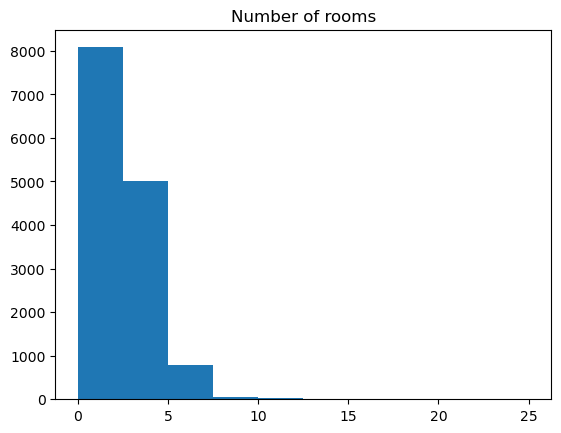

In [ ]:
plt.hist(data['Number of rooms'])
plt.title('Number of rooms')
plt.show()

# remove > 6? (156 rows)

In [150]:
data[data['Number of rooms'] > 6] # single castle, to drop


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
157,20313806,1030,HOUSE,MIXED_USE_BUILDING,770000.0,residential_sale,7,260.0,-1,0.0,...,-1,NaN,-1,NaN,NaN,110.0,2,0,GOOD,single
355,20192026,6890,HOUSE,VILLA,360000.0,residential_sale,7,226.0,1,-1.0,...,1,NaN,1,500.0,500.0,2066.0,4,-1,TO_BE_DONE_UP,single
364,20316356,2830,HOUSE,VILLA,749000.0,residential_sale,8,384.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,923.0,4,0,GOOD,single
766,20148041,4000,HOUSE,VILLA,595000.0,residential_sale,7,455.0,1,-1.0,...,1,28.0,1,3100.0,3100.0,3333.0,4,-1,TO_RENOVATE,single
831,20286621,8740,HOUSE,VILLA,1895000.0,residential_sale,8,334.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,18262.0,4,-1,GOOD,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15294,20122032,3020,HOUSE,MANSION,825000.0,residential_sale,11,669.0,1,-1.0,...,1,NaN,-1,NaN,NaN,799.0,2,-1,TO_BE_DONE_UP,single
15297,20304356,1473,HOUSE,EXCEPTIONAL_PROPERTY,950000.0,residential_sale,7,382.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,15400.0,4,1,TO_BE_DONE_UP,single
15331,11419026,6800,HOUSE,HOUSE,339000.0,residential_sale,8,120.0,1,1.0,...,1,40.0,1,630.0,630.0,770.0,3,0,GOOD,single
15432,20303201,4870,HOUSE,APARTMENT_BLOCK,1245000.0,residential_sale,12,814.0,1,0.0,...,1,NaN,-1,NaN,NaN,28600.0,4,0,GOOD,single


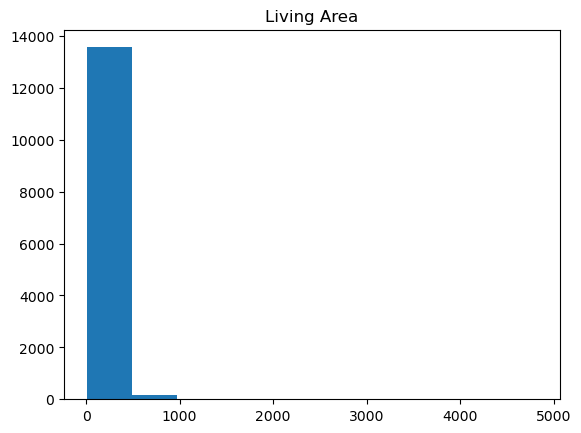

In [ ]:
plt.hist(data['Living Area'])
plt.title('Living Area')
plt.show()

# Remove >= 500 (183 rows)

In [152]:
data[data['Living Area'] >= 500] # A farmhouse

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
142,20316318,8540,HOUSE,VILLA,1195000.0,residential_sale,5,500.0,1,-1.0,...,1,NaN,-1,NaN,NaN,1560.0,4,1,GOOD,single
306,20263033,1050,HOUSE,HOUSE,1995000.0,residential_sale,4,544.0,1,0.0,...,1,90.0,1,250.0,250.0,666.0,2,0,AS_NEW,single
643,20314356,1000,HOUSE,APARTMENT_BLOCK,675000.0,residential_sale,0,1042.0,-1,0.0,...,-1,NaN,-1,NaN,NaN,971.0,2,0,NaN,single
661,20292008,8420,HOUSE,HOUSE,645000.0,residential_sale,4,568.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,2263.0,-1,-1,GOOD,single
717,20310041,2860,HOUSE,VILLA,1490000.0,residential_sale,5,564.0,1,-1.0,...,1,NaN,-1,NaN,NaN,1610.0,4,1,AS_NEW,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15262,20264615,1050,HOUSE,HOUSE,1995000.0,residential_sale,4,544.0,1,0.0,...,1,NaN,1,230.0,230.0,405.0,2,-1,AS_NEW,single
15294,20122032,3020,HOUSE,MANSION,825000.0,residential_sale,11,669.0,1,-1.0,...,1,NaN,-1,NaN,NaN,799.0,2,-1,TO_BE_DONE_UP,single
15367,20272126,2950,HOUSE,VILLA,2300000.0,residential_sale,5,627.0,1,0.0,...,1,NaN,-1,NaN,NaN,4022.0,4,1,AS_NEW,single
15429,20261577,9630,HOUSE,VILLA,1100000.0,residential_sale,6,561.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,4925.0,-1,-1,GOOD,single


In [19]:
data.groupby("Type of property").count()

,id,Locality,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,Fireplace,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
Type of property,,,,,,,,,,,,,,,,,,,,
APARTMENT,7718,7718,7718,7718,7718,7718,7581,5177,3556,7718,6257,5214,618,618,618,0,4229,2513,5275,7718
HOUSE,4207,4207,4207,4207,4207,4207,4155,3115,1984,4207,2945,1643,1927,1927,1927,4207,3386,1757,3904,4207


In [1]:
import seaborn as sns

In [3]:
# Heatmap correlation matrix of the continuous data + response variable

corr_matrix = data[['Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Garden area', 'Surface of the land', 'Surface area of the plot of land', 'Number of facades']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

NameError: name 'data' is not defined

<Axes: title={'center': 'Price'}, xlabel='Garden'>

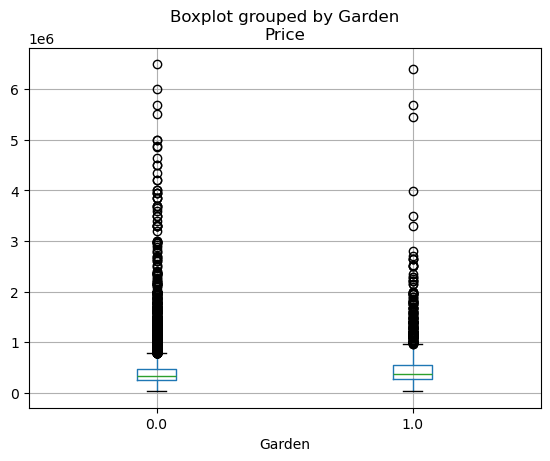

In [102]:
data_modified.boxplot(column= 'Price', by='Garden')

In [98]:
data_modified = data[['Garden', 'Price', 'Type of property']]
data_modified['Garden'] = data_modified['Garden'].fillna(0)

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_3356\2339460935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['Garden'] = data_modified['Garden'].fillna(0)


In [114]:
data_modified[data_modified['Garden'] == 1.0]['Type of property'].value_counts()

Type of property
HOUSE        1927
APARTMENT     618
Name: count, dtype: int64

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data.select_dtypes(include=['float64', 'int64']))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['response_variable'])

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values